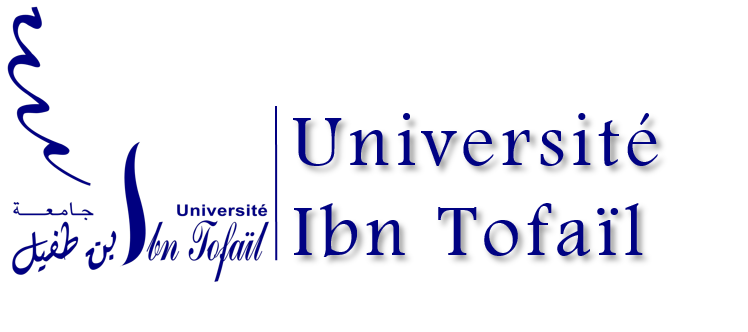

<center><h2 style="color:#023182;text-transform: uppercase;font-family:algerian;font-size:30px">TP N°5: la classifcation ascendante hierarchique CAH </h2></center>  

<hr style="border:2px solid black">


<h1>les Objectifs du TP </h1>
<ol>
<li>Classification Hiérarchique :</li>
<ul>
    <li>Comprendre les principes de la classification hiérarchique.</li>
    <li>Apprendre à construire un dendrogramme pour représenter les relations entre les données.</li>
    <li>Explorer les différents critères de liaison (linkage) et comprendre leur impact sur les résultats.</li>
    <li>Appliquer la classification hiérarchique à un ensemble de données et interpréter les résultats.</li>
</ul>



<h1 style="font-family:Castellar;font-size:40px">1-Classification Ascendante Hiérarchique (CAH)</h1>

<h1 style="font-family:Castellar;font-size:25px;color:blue">Préparation des données </h1>

In [36]:
#importer les bibliotheques
import pandas as pd
import numpy as np 
from sklearn.datasets import make_blobs

In [37]:
# question 1: Utilisez la fonction make_blobs pour générer un jeu de données simulées composé de 3 clusters. 
# indication : make_blobs(n_samples,centers,cluster_std,random_state)
x , y = make_blobs( n_samples=20, centers=3, cluster_std=1,random_state=42)
x

array([[-2.97867201,  9.55684617],
       [-4.23411546,  8.4519986 ],
       [-3.52202874,  9.32853346],
       [-2.26723535,  7.10100588],
       [ 3.48888526,  2.3488677 ],
       [-8.20781324, -6.68324836],
       [-2.97261532,  8.54855637],
       [ 4.62638161,  0.91545875],
       [ 4.09549611,  2.08409227],
       [ 4.03924015,  1.68147593],
       [-6.6707636 , -8.83977972],
       [ 6.10552761,  1.74739338],
       [-6.14116061, -6.70874131],
       [-3.4172217 ,  7.60198243],
       [-6.99527547, -7.18121329],
       [-0.92998481,  9.78172086],
       [-8.35814918, -7.5999538 ],
       [-6.05708228, -8.10095324],
       [ 4.70740704,  0.5484215 ],
       [ 4.03817222,  3.82544787]])

In [38]:
# Après avoir utilisé la fonction make_blobs pour générer des données, 
# question 2: insérez-les dans un DataFrame avec des colonnes nommées ‘variables 1’, ‘variable 2’
# df = pd.read_csv('../data/data09022024.csv')
data = pd.DataFrame(x , columns=['var1' , 'var2'])
data

,var1,var2
0,-2.978672,9.556846
1,-4.234115,8.451999
2,-3.522029,9.328533
3,-2.267235,7.101006
4,3.488885,2.348868
5,-8.207813,-6.683248
6,-2.972615,8.548556
7,4.626382,0.915459
8,4.095496,2.084092
9,4.039240,1.681476


In [39]:
# question 3: Affichez la taille (nombre de lignes et colonnes) du DataFrame.
data.shape

(20, 2)

In [40]:
#question 4: Affichez les 10 premiers éléments du DataFrame.
data.head(10)

,var1,var2
0,-2.978672,9.556846
1,-4.234115,8.451999
2,-3.522029,9.328533
3,-2.267235,7.101006
4,3.488885,2.348868
5,-8.207813,-6.683248
6,-2.972615,8.548556
7,4.626382,0.915459
8,4.095496,2.084092
9,4.039240,1.681476


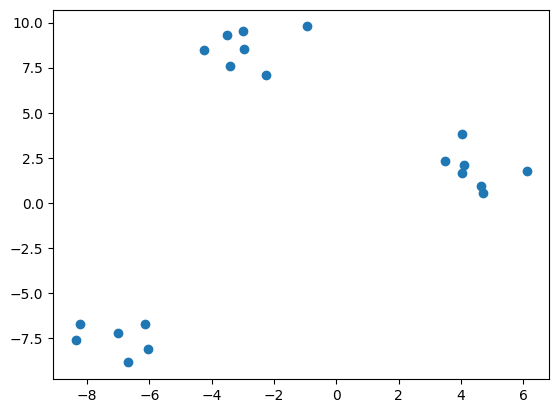

In [41]:
#question 5 : Affichez maintenant le nuage de points en utilisant la fonction scatter() de la bibliothèque Matplotlib.
import matplotlib.pyplot as plt
plt.scatter(data['var1'] , data['var2'])

In [42]:
# Que remarquez-vous en observant les résultats ?


<h1 style="font-family:Castellar;font-size:25px;color:blue">standardisation des variables </h1>

In [43]:
# question 6 : utiliser un objet de la calsse StandardScaler() [sklearn.preprocessing]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Vérification des données transformées
x_scaled = scaler.fit_transform(data) 
data = pd.DataFrame(x_scaled , columns=['var1' , 'var2'])
data

,var1,var2
0,-0.290134,1.240294
1,-0.551033,1.071874
2,-0.403051,1.205490
3,-0.142287,0.865933
4,1.053917,0.141533
5,-1.376824,-1.235293
6,-0.288875,1.086593
7,1.290305,-0.076971
8,1.179979,0.101172
9,1.168288,0.039798


In [44]:
data.describe()

,var1,var2
count,2.000000e+01,2.000000e+01
mean,5.551115e-17,-3.608225e-17
std,1.025978e+00,1.025978e+00
min,-1.408066e+00,-1.564027e+00
25%,-9.342397e-01,-1.236264e+00
50%,-2.895046e-01,7.550909e-02
75%,1.168122e+00,9.746940e-01
max,1.597692e+00,1.274573e+00


<h1 style="font-family:Castellar;font-size:25px;color:blue">la matrice de proximité entre les points donnés.</h1>

In [45]:
# question 7: Créez une fonction euclidean_distance pour calculer la distance euclidienne entre deux points.
def euclidean_distance(point1, point2):
    distance = np.sqrt( np.sum(np.pow(point1 - point2,2) ))
    return distance
print(euclidean_distance(2,3))

# question 8 : Créez une fonction qui calcule la matrice de proximité entre les points (en utilisant la distance euclidienne).
def matrice_prox(data):
    n = data.shape[0]  # Nombre de lignes
    matrix = np.zeros((n,n))
    for i in range(n) :
        for j in range(n):
            matrix[i,j] = euclidean_distance(data.iloc[i] , data.iloc[j])
    return matrix
matrice_prox(data)


1.0


array([[0.        , 0.31053723, 0.11815911, 0.40249739, 1.73601446,
        2.70359422, 0.1537055 , 2.05741865, 1.85979316, 1.88896379,
        2.90738987, 2.23182702, 2.56509401, 0.31161791, 2.68455939,
        0.42712418, 2.8442398 , 2.76667545, 2.10642132, 1.69989898],
       [0.31053723, 0.        , 0.19937868, 0.45769498, 1.85510046,
        2.45049982, 0.26257059, 2.1703385 , 1.98460725, 2.00530455,
        2.68409877, 2.37940345, 2.34478736, 0.21356152, 2.4511838 ,
        0.71593899, 2.59265424, 2.55155745, 2.21457638, 1.85814113],
       [0.11815911, 0.19937868, 0.        , 0.42813168, 1.80409534,
        2.62786117, 0.16484135, 2.12418469, 1.93015653, 1.95651365,
        2.84576926, 2.3105166 , 2.50452806, 0.26408939, 2.61815096,
        0.54307544, 2.76932309, 2.70861963, 2.1716602 , 1.7810437 ],
       [0.40249739, 0.45769498, 0.42813168, 0.        , 1.39844893,
        2.43705385, 0.26491279, 1.7150475 , 1.52749748, 1.54922801,
        2.59656403, 1.92185496, 2.2537997 , 0

<h1 style="font-family:Castellar;font-size:25px;color:blue">linkage</h1>

<p>Le choix de la méthode de linkage influence la manière dont les points ou clusters sont regroupés, et donc, la structure finale des clusters.</p>
<p>•Principales méthodes de linkage :</p>
	<li>Single linkage : Distance minimale entre deux clusters (exemple : amis les plus proches).</li>
	<li>Complete linkage : Distance maximale entre deux clusters (exemple : distance entre les deux points les plus éloignés).</li>
	<li>Average linkage : Moyenne des distances entre tous les points des deux clusters.</li>
	<li>Ward’s linkage : Minimise la variance interne des clusters.</li>

In [46]:
from scipy.cluster.hierarchy import dendrogram, linkage
# question 9 : Calcul la matrice de linkage avec la methode  Ward
#indication :linkage(data,method)
z = linkage(data, method='ward')
z

array([[ 7.        , 18.        ,  0.05842878,  2.        ],
       [ 8.        ,  9.        ,  0.06247704,  2.        ],
       [ 0.        ,  2.        ,  0.11815911,  2.        ],
       [ 5.        , 16.        ,  0.14318937,  2.        ],
       [ 4.        , 21.        ,  0.16124505,  3.        ],
       [10.        , 17.        ,  0.17014277,  2.        ],
       [ 6.        , 22.        ,  0.17091375,  3.        ],
       [12.        , 14.        ,  0.19155273,  2.        ],
       [ 1.        , 13.        ,  0.21356152,  2.        ],
       [25.        , 27.        ,  0.33427671,  4.        ],
       [19.        , 24.        ,  0.33627131,  4.        ],
       [26.        , 28.        ,  0.34044024,  5.        ],
       [11.        , 20.        ,  0.38874641,  3.        ],
       [ 3.        , 31.        ,  0.4418027 ,  6.        ],
       [30.        , 32.        ,  0.61950654,  7.        ],
       [23.        , 29.        ,  0.63248204,  6.        ],
       [15.        , 33.

les colonnes de la matrice de linkage :
	<ol><li>Première colonne : Premier cluster fusionné.</li>
	<li>Deuxième colonne : Deuxième cluster fusionné.</li>
	<li>Troisième colonne : Distance entre les clusters fusionnés.</li>
	<li>Quatrième colonne : Nombre total de points dans le nouveau cluster.</li></ol>

<h3>Le dendrogramme aide à identifier les regroupements naturels dans les données. On peut décider où couper le dendrogramme pour former des clusters.</h3>
	•	Structure :
	<ul><li>Les feuilles (bas du diagramme) représentent les points individuels.</li>
	<li>Les branches montrent comment les clusters sont fusionnés.</li>
	<li>La hauteur d’une branche correspond à la distance entre les clusters fusionnés.</li></ul>

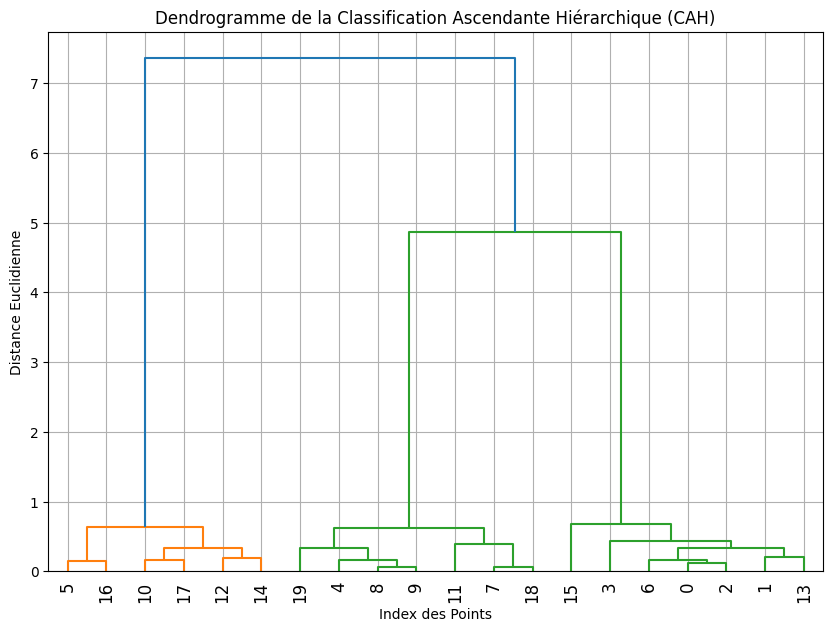

In [47]:
# question 10 : Tracer le dendrogramme
# dendrogram(data, labels[Liste des étiquettes pour les feuilles], leaf_rotation[Angle de rotation des étiquettes des feuilles])
plt.figure(figsize=(10, 7))
dendrogram(z , labels=data.index , leaf_rotation=90)
plt.title('Dendrogramme de la Classification Ascendante Hiérarchique (CAH)')
plt.xlabel('Index des Points')
plt.ylabel('Distance Euclidienne')
plt.grid(True)
plt.show()

<i>demarche</i>

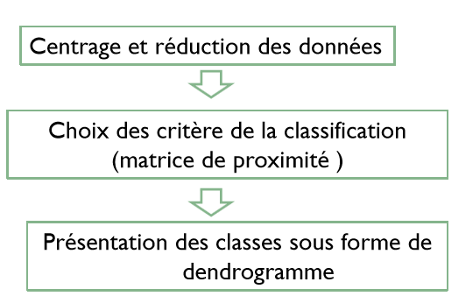

In [48]:
# importer les bibliothèques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [49]:
data=pd.read_csv('../data/data09022024.csv')
data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [50]:
# question 11 : prendre une copie de notre jeu de données. (df).
data_copy = data.copy()
data_copy

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [51]:
# question 12 : afficher dataset(df)
# remarque : Annual Income = Revenu annuel en k$ / Spending Score = depenses score varie entre 1 et 100

data_copy



,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [52]:
# question 13 : supprimer la colonne 'CustomerID'

data_copy.drop('CustomerID',axis=1,inplace=True)
data_copy

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
5,Female,22,17,76
6,Female,35,18,6
7,Female,23,18,94
8,Male,64,19,3
9,Female,30,19,72


In [53]:
# question 14 : vérifier les dimensions(data)
data_copy.shape

(40, 4)

In [54]:
# question 15 : Afficher les noms des différentes colonnes.
data_copy.columns

Index(['Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [55]:
# question 16 : Renommer les variables 'Annual Income (k$)' et 'Spending Score (1-100)' en 'Revenu' et 'Dépense'
data_copy.rename(columns={'Annual Income (k$)': 'Revenu', 'Spending Score (1-100)': 'Depense'}, inplace=True)
data_copy

,Genre,Age,Revenu,Depense
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
5,Female,22,17,76
6,Female,35,18,6
7,Female,23,18,94
8,Male,64,19,3
9,Female,30,19,72


In [56]:
# question 17 : Créez la fonction 'codage_genre' pour encoder une colonne ('col') d'un ensemble de données ('data') 
# en attribuant la valeur 1 pour 'homme' (male) et 0 pour 'femme' (female).

def codage_genre(data, col):

    data.loc[data[col] == 'Male' , 'Genre' ] = 1
    data.loc[data[col] == 'Female' , 'Genre' ] = 0
    return data




In [57]:
# question 18: définir une fonction nommée 'centrer_reduit' pour réaliser le centrage et la réduction des variables passées en paramètre
def centrer_reduit(data,col):
    if isinstance(col, list):  # Si plusieurs colonnes sont spécifiées
        for c in col:
            data[c] = (data[c] - data[c].mean()) / data[c].std()
    else:  # Si une seule colonne est spécifiée
        data[col] = (data[col] - data[col].mean()) / data[col].std()
    
    return data




In [58]:
# question 19:appliquer l'encodage à la colonne 'genre',
codage_genre(data_copy, "Genre")

,Genre,Age,Revenu,Depense
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
5,0,22,17,76
6,0,35,18,6
7,0,23,18,94
8,1,64,19,3
9,0,30,19,72


In [59]:
# question 20 : appliquer le centrage et la réduction des variables 'Age','revenu','depense'
centrer_reduit(data_copy , "Age")
centrer_reduit(data_copy , "Depense")
centrer_reduit(data_copy , "Revenu")


,Genre,Age,Revenu,Depense
0,1,-1.136053,-1.437303,-0.314765
1,1,-0.990870,-1.437303,0.971867
2,0,-1.063462,-1.285207,-1.325691
3,0,-0.845688,-1.285207,0.849330
4,0,-0.264958,-1.133112,-0.284131
5,0,-0.918279,-1.133112,0.818696
6,0,0.025407,-0.981016,-1.325691
7,0,-0.845688,-0.981016,1.370110
8,1,2.130553,-0.828921,-1.417593
9,0,-0.337549,-0.828921,0.696160


In [60]:
# question 21 : afficher la nouvelle dataset 
data_copy

,Genre,Age,Revenu,Depense
0,1,-1.136053,-1.437303,-0.314765
1,1,-0.990870,-1.437303,0.971867
2,0,-1.063462,-1.285207,-1.325691
3,0,-0.845688,-1.285207,0.849330
4,0,-0.264958,-1.133112,-0.284131
5,0,-0.918279,-1.133112,0.818696
6,0,0.025407,-0.981016,-1.325691
7,0,-0.845688,-0.981016,1.370110
8,1,2.130553,-0.828921,-1.417593
9,0,-0.337549,-0.828921,0.696160


In [61]:
# question 22 : définir une fonction (euclidean_distance) pour calculer la distance euclidienne entre deux points

def euclidean_distance(point1, point2):
    distance = np.sqrt( np.sum(np.pow(point1 - point2,2) ))
    return distance


In [62]:
#question 23 :convertir dataframe en vecteur 
vector = data['Age'].to_numpy()  # or data['age'].values
vector

array([19, 21, 20, 23, 31, 22, 35, 23, 64, 30, 67, 35, 58, 24, 37, 22, 35,
       20, 52, 35, 35, 25, 46, 31, 54, 29, 45, 35, 40, 23, 60, 21, 53, 18,
       49, 21, 42, 30, 36, 20])

In [63]:
nb_points = df.shape[0]
# question 24 :créer une matrice initialisée avec des zéros en utilisant la fonction np.zeros de la bibliothèque NumPy
........................................
# question 25 :remplir la matrice la matrice de proximité
for i in range(nb_points):
    for j in range(nb_points):
        ................................


SyntaxError: invalid syntax (100400182.py, line 3)

In [405]:
# question 26 : afficher la matrice de proximite


In [406]:
# question 27 : Presenter les classes sous forme de dendrogramme 
# importer la bibliothèque hierarchy pour generer le dendrogramme  
import scipy.cluster.hierarchy as cah


<b>Exemple de données de liaison</b>
 <div style='color:red'>linkage_matrix = cah.linkage(your_data 'sans index et sans label', method='ward')</div> la méthode 'ward' à des données, elle est utilisée pour mesurer la similarité entre deux clusters lors de la fusion, en minimisant la variance totale des clusters fusionnés.<br>
<b>Création du dendrogramme</b>
 <div style='color:blue'>dendrogram = cah.dendrogram(<span style='color:red'>linkage_matrix</span>,<span style='color:green'>labels</span>,orientation)</div>

In [10]:
# question 28 : generer le dendrogramme en utilisant cah
............................................